# 📧 Spam Email Detection with Machine Learning

![Banner Placeholder](banner.jpg)

**Welcome to the Spam Email Detection Project!**  
This project is part of my virtual internship at **Ezitech Institute**, a subsidiary of **Eziline Software House**.  
Ezitech Institute, founded in 2015, is dedicated to empowering aspiring young talents with the essential skills needed in the ever-evolving field of technology. Their internship programs are designed to provide practical experience and prepare students for the challenges of the IT sector.

---

### About the Project  
This project leverages a Kaggle dataset to develop a machine learning model that accurately detects spam emails. The goal is to enhance email filtering systems by employing modern techniques in natural language processing and machine learning.

**Dataset Source:** [Spam Email Dataset on Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/spam-email)  

**Technologies Used:** Python, Scikit-learn, Pandas, and more.

---

In [2]:
# Importing necessary Libraries
import pandas as pd

In [4]:
df=pd.read_csv('spam.csv')

In [5]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


- let's first convert encode the `Category` column

In [6]:
df['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [10]:
df['spam']=encoder.fit_transform(df['Category'])

In [15]:
df.sample(5)

,Category,Message,spam
3199,ham,7 lor... Change 2 suntec... Wat time u coming?,0
2160,spam,FREE for 1st week! No1 Nokia tone 4 ur mob eve...,1
1148,ham,Ok... Help me ask if she's working tmr a not?,0
5041,spam,Natalie (20/F) is inviting you to be her frien...,1
5094,ham,"Hi Shanil,Rakhesh here.thanks,i have exchanged...",0


- ham ----> 0
- spam ---> 1

### data structure (text messages labeled as spam or ham)
- so we'll use `Multinomial Naive Bayes` or `Support Vector Machines (SVM)`

#### Separate into input and output features

In [16]:
X=df['Message']
y=df['spam']

#### splitting trainig and testing data

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Let's convert 'Message` column into numerical features

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()

In [26]:
X_train_count = v.fit_transform(X_train.values)
X_train_count.toarray()[:2]
X_test_count = v.transform(X_test)

## Using Multinomial Naive Bayes

In [27]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [28]:
nb.fit(X_train_count,y_train)

MultinomialNB()

In [31]:
# getting test and train accuracy
print(round(nb.score(X_test_count, y_test),5))
print(round(nb.score(X_train_count, y_train),5))

0.99193
0.99327


- getting classfication report and cm matrix

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       966
           1       1.00      0.94      0.97       149

    accuracy                           0.99      1115
   macro avg       1.00      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115



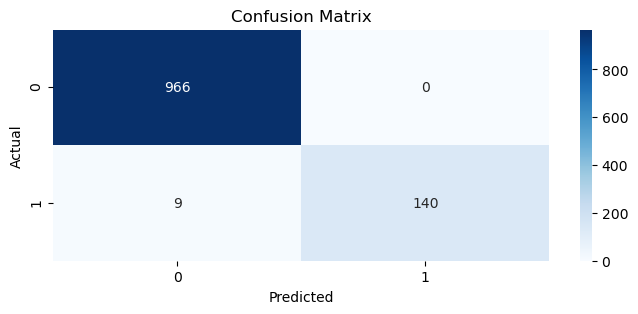

In [37]:
# Predict on the test data
y_pred = nb.predict(X_test_count)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Using SVM (Support Vector Machine)

In [44]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', random_state=42)

In [45]:
svm.fit(X_train_count, y_train)

SVC(kernel='linear', random_state=42)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       966
           1       1.00      0.91      0.95       149

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



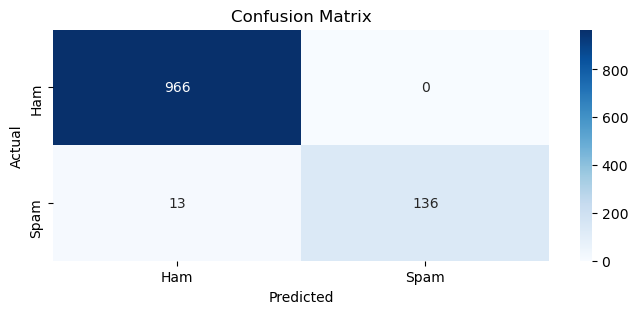

In [47]:
# Predict on the test data
y_pred = svm.predict(X_test_count)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 🏆 Conclusion: Best Model for Spam Detection

After evaluating multiple machine learning models, the **Multinomial Naive Bayes** model outperformed **Support Vector Machine (SVM)** in terms of precision, recall, and F1-score for the spam class.

### Key Metrics Comparison:
- **Multinomial Naive Bayes**:
  - **Spam Class (1)**: Precision = 1.00, Recall = 0.94, F1-score = 0.97
- **SVM**:
  - **Spam Class (1)**: Precision = 1.00, Recall = 0.91, F1-score = 0.95

### Decision:
Given its superior performance and simplicity, we will finalize the **Multinomial Naive Bayes** model for our spam email detection project.

This model is efficient and highly accurate for text classification tasks, making it an ideal choice for this dataset.

---

#### Saving the final model

In [48]:
import joblib

# Save the trained Multinomial Naive Bayes model
joblib.dump(nb, 'spam_detector_model.pkl')

# Save the vectorizer
joblib.dump(v, 'vectorizer.pkl')

['vectorizer.pkl']